# preparing dataset for training

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
#constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCH = 50
CHANNELS = 3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/PlantVillage',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset) #since the dataset is divided in 32 batches hence total images 68*32

68

In [10]:
for data in dataset.take(1):
    print(data)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[162., 151., 159.],
         [166., 155., 163.],
         [166., 155., 163.],
         ...,
         [137., 126., 132.],
         [131., 120., 126.],
         [136., 125., 131.]],

        [[153., 142., 150.],
         [157., 146., 154.],
         [158., 147., 155.],
         ...,
         [148., 137., 143.],
         [142., 131., 137.],
         [154., 143., 149.]],

        [[152., 141., 149.],
         [156., 145., 153.],
         [158., 147., 155.],
         ...,
         [149., 138., 144.],
         [137., 126., 132.],
         [153., 142., 148.]],

        ...,

        [[153., 140., 149.],
         [152., 139., 148.],
         [151., 138., 147.],
         ...,
         [143., 128., 133.],
         [148., 133., 138.],
         [142., 127., 132.]],

        [[149., 136., 145.],
         [148., 135., 144.],
         [147., 134., 143.],
         ...,
         [136., 121., 126.],
         [142., 127., 132.],
       

(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]
(32, 256, 256, 3)
(256, 256, 3)
[0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 1 1]


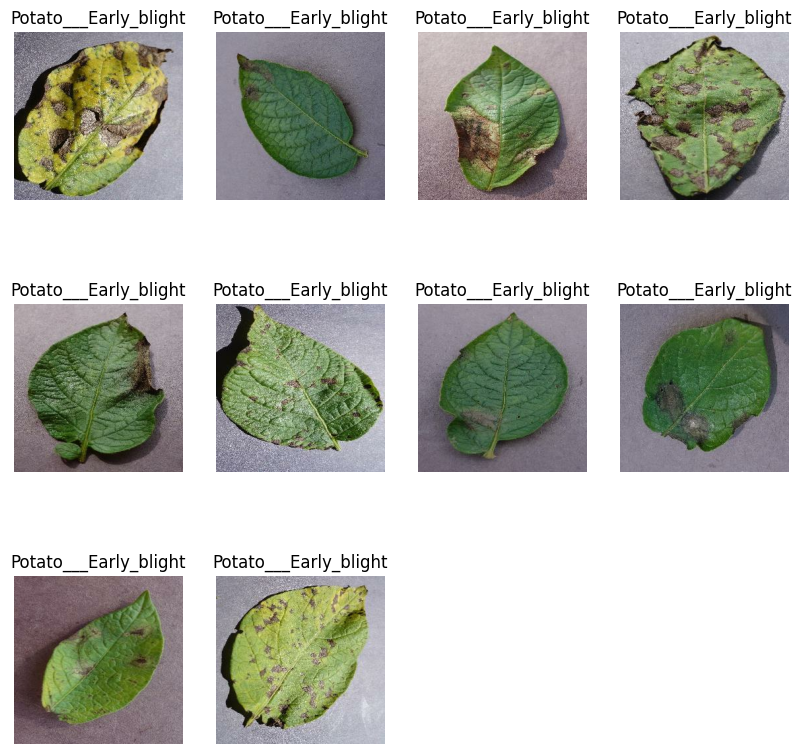

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        #if we want to plot more than images then we need to have subplot
        ax = plt.subplot(3,4,i+1)
        print(image_batch.shape)
        #let's print the first image
        #print(image_batch[0].numpy())
        print(image_batch[i].shape)
        #let's plot this image
        #we are converting the float type value to since plt require int values
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        #let's label it but this will give number so we have class names as well so le't pass it in classname
        #plt.title(label_batch[0].numpy())
        #class_names[label_batch[0].numpy()]
        plt.title(class_names[label_batch[0].numpy()])
        print(label_batch.numpy())


#first is the shape of a batch i.e 32 images of size 256*256 pixels, 3 is the rgb channel
#label_batch is the output or the y axis, since we have three classes since three folders so it has internally named numbered the folders as colors

In [12]:
len(dataset)

68

In [13]:
#we will have 80% as training data
#20%  out of which => 10% validation , 10% for testing
#validation is the data that the model will use in each epoch for testing against the prediction it has made
#10% test data will be used getting matrix on testing

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
#for testing
#let's skip the first 54 and that will be testing dataset
testing_ds = dataset.skip(54)
len(testing_ds)

14

In [17]:
validation_size = 0.1 #i.e 10%
len(dataset)*validation_size

6.800000000000001

In [18]:
val_ds = testing_ds.take(6)   #validation dataset

In [19]:
test_ds = testing_ds.skip(6)  #test dataset

In [20]:
#let's create a function to do it
def get_dataset_partition_tf(dataset, train_split=0.8,val_split=0.1, test_split = 0.1,shuffle=True,shuffle_size = 10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed =12)
    train_set_size = int(len(dataset)*train_split)
    train_ds = dataset.take(train_set_size)
    testing_ds = dataset.skip(train_set_size)
    val_ds_size = int(len(dataset)*val_split)
    val_ds = testing_ds.take(val_ds_size)
    test_ds = testing_ds.skip(val_ds_size)
    return train_ds, val_ds, test_ds

In [21]:
train_ds,val_ds, test_ds = get_dataset_partition_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# creating model

In [20]:
resize_and_rescale = tf.keras.Sequential([
    #resizing the input of images to our required size
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    #diving the image pixels to make it in range of 0-1
    layers.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2)
])

In [22]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    #defining convolutional layers
    #conv2d layer is always followed by max-pooling which which will reduce the size of image
    layers.Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu',
                input_shape= input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #flatter the layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    
])


In [23]:
model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [25]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
             )

In [26]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 35s 602ms/step - loss: 0.8935 - accuracy: 0.5359 - val_loss: 0.7856 - val_accuracy: 0.6667
Epoch 2/50
54/54 [==============================] - 31s 570ms/step - loss: 0.5652 - accuracy: 0.7512 - val_loss: 0.4442 - val_accuracy: 0.8021
Epoch 3/50
54/54 [==============================] - 32s 597ms/step - loss: 0.4180 - accuracy: 0.8160 - val_loss: 0.4878 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 33s 617ms/step - loss: 0.3050 - accuracy: 0.8785 - val_loss: 0.2988 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 33s 619ms/step - loss: 0.2584 - accuracy: 0.8935 - val_loss: 0.2847 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 36s 662ms/step - loss: 0.2278 - accuracy: 0.9115 - val_loss: 0.1808 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 37s 683ms/step - loss: 0.1815 - accuracy: 0.9265 - val_loss: 0.2087 - val_accuracy: 0.9010

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 104ms/step - loss: 0.2618 - accuracy: 0.9336


In [30]:
scores
#first parameter is total loss and second is accuracy

[0.26179221272468567, 0.93359375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

first image to predict
first image's ACTUAL label Potato___Early_blight
1/1 [==============================] - 0s 376ms/step
0
class name PREDICTED Potato___Early_blight


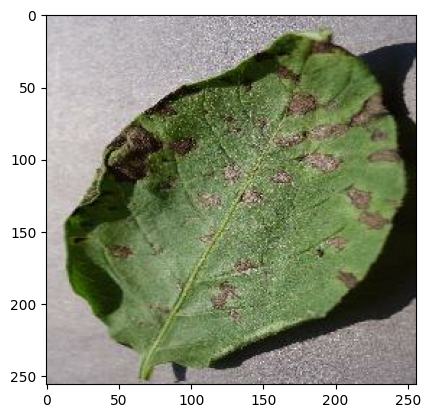

In [43]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label  = label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's ACTUAL label",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    #np.argmax gives index of value which has highest value and that will be the class number
    class_predicted = np.argmax(batch_prediction[0])
    print(class_predicted)
    print("class name PREDICTED",class_names[class_predicted])

### saving the model

In [44]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


### load the saved model

In [54]:

#now the /1 model directory is named as saved_model , i have done locally just changed the directory name for further working easiness nothing else
model = tf.keras.models.load_model("models/saved_model")

In [55]:
model.evaluate(test_ds)

8/8 [==============================] - 3s 382ms/step - loss: 0.2800 - accuracy: 0.9180


[0.2800137996673584, 0.91796875]

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)  #create a batch since three format of image required is batch , img_size, image_size
    predictions = model.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    #get the prediction score
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

In [58]:
data = test_ds.take(1)

(32, 256, 256, 3)
(32,)
tf.Tensor([0 0 1 1 2 1 0 1 0 0 0 1 1 2 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1], shape=(32,), dtype=int32)
1/1 [==============================] - 0s 112ms/step
[[9.9990833e-01 9.1692265e-05 6.8464573e-10]]
1/1 [==============================] - 0s 38ms/step
[[9.999999e-01 9.253694e-08 5.691004e-17]]
1/1 [==============================] - 0s 42ms/step
[[9.5937443e-01 4.0625509e-02 6.2572404e-16]]
1/1 [==============================] - 0s 30ms/step
[[1.05509795e-01 8.94490242e-01 5.14760623e-10]]
1/1 [==============================] - 0s 27ms/step
[[7.642368e-11 1.342991e-03 9.986570e-01]]
1/1 [==============================] - 0s 63ms/step
[[9.9945599e-01 5.4402894e-04 3.2761775e-15]]
1/1 [==============================] - 0s 63ms/step
[[9.9078369e-01 9.2160534e-03 2.5028604e-07]]
1/1 [==============================] - 0s 33ms/step
[[2.4176615e-03 9.9758232e-01 3.7481391e-09]]
1/1 [==============================] - 0s 47ms/step
[[1.0000000e+00 8.6921220e-10 4.8002895

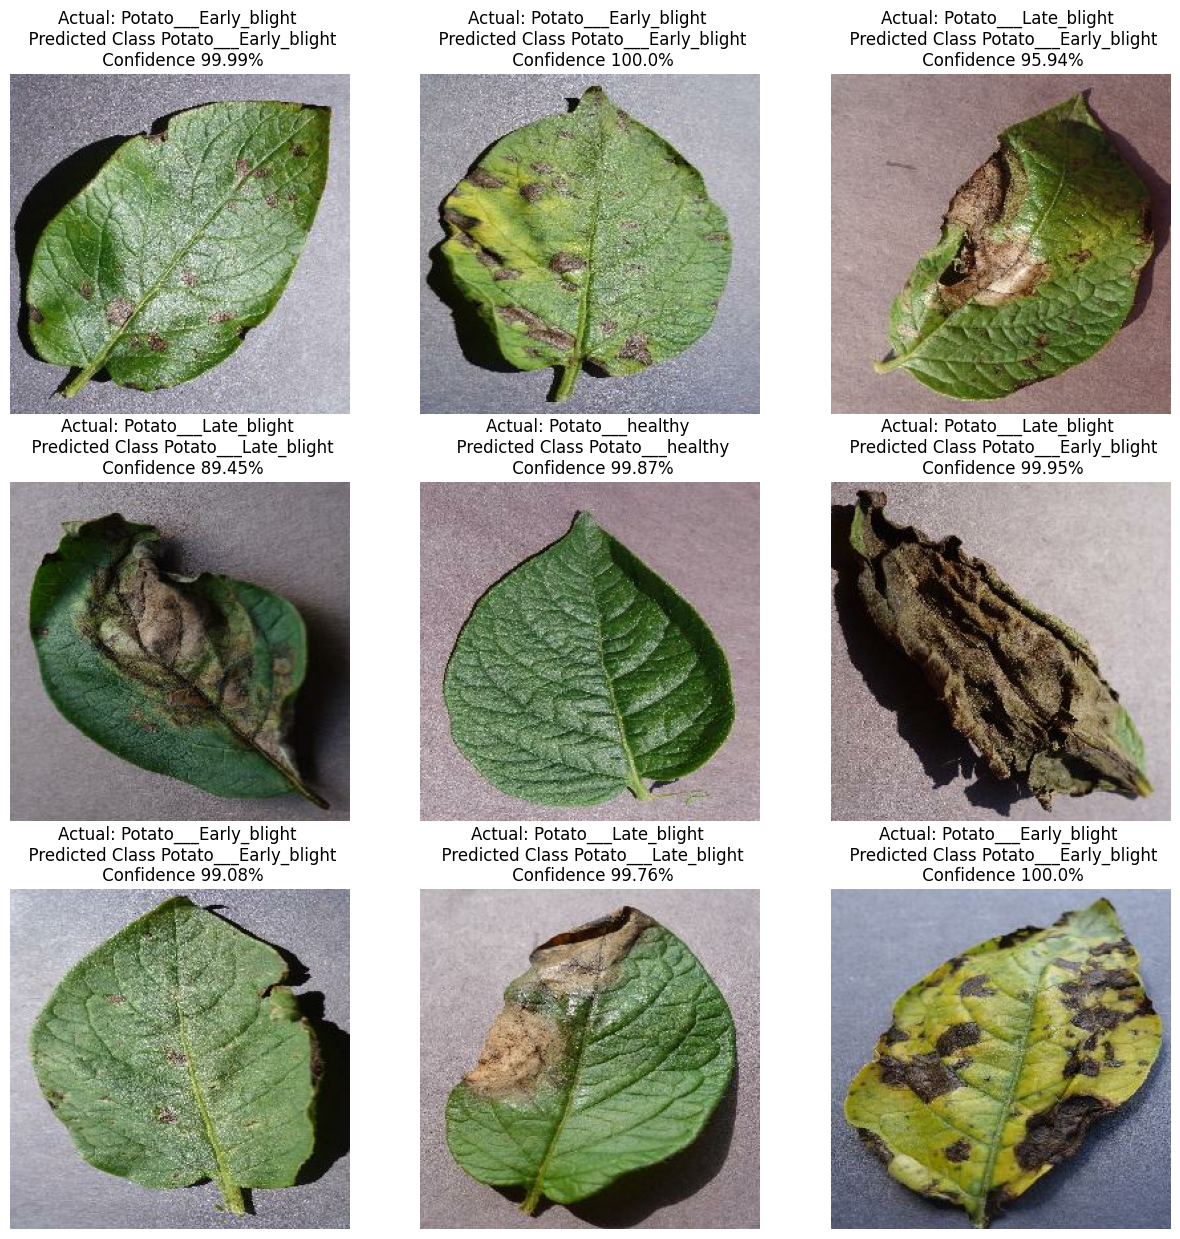

In [59]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
    print(images.shape)
    #(32, 256, 256, 3)
    #this means there are 32 images in each test_ds.take(1)
    #the shape of each image is 256*256 pixels and 3 is the color dimensions rgb
    print(labels.shape)
    print(labels)
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.axis("off")
        plt.imshow(images[i].numpy().astype('uint8'))
        #we fetch the prediction and show it
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class} \n  Predicted Class {predicted_class} \n Confidence {confidence}%")

# serving model using tensorflow serving and fastapi 

In [60]:
#this part is done in .py file in the same folder